## Set Environment

In [39]:
library(rjson)

```
betas <- vector()
alpha <- 10
sigma <- 10
for(i in 1:numRegressions) {
    B <- rnorm(1,0,betaSD)
    betas <- c(betas,unlist(B))
    for(j in 1:numPoints) {
        X <- runif(1,0,30)
        Y <- rnorm(1,X*B+alpha,sd=sigma)
        cat(paste(X,Y,sep="\t"))
        if(j<numPoints) cat("\t")
    }
    cat("\n")
}
```

## Test rnorm function with multiple mean values

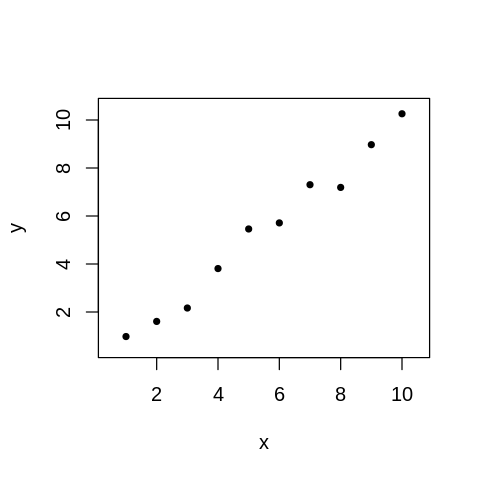

In [33]:
options(repr.plot.height=4, repr.plot.width=4)
plot(1:10, rnorm(n=10, mean=1:10, sd=0.5), pch=20, 
     xlim=c(0.5,10.5), ylim=c(0.5,10.5),
     xlab="x",         ylab="y")

## Test simulate a sample

In [19]:
library(rjson)

In [35]:
numPoints = 10
alpha = 10
sigma = 10
SEED  = 123

set.seed(SEED)
b  = 1
xs = runif(n=numPoints, min=0, max=1)
ys = rnorm(n=numPoints, mean=xs * b + alpha, sd=sigma)

print(xs)
print(ys)

 [1] 0.2875775 0.7883051 0.4089769 0.8830174 0.9404673 0.0455565 0.5281055
 [8] 0.8924190 0.5514350 0.4566147
 [1] 27.438227 15.397467 -2.241635  4.014489  6.483848 22.286374 14.126244
 [8] 14.900134 11.658262  4.898203


**Double check the results**

In [36]:
numPoints = 10
alpha = 10
sigma = 10
SEED  = 123

set.seed(SEED)
b  = 1
xs = runif(n=numPoints, min=0, max=1)
ys = sapply(xs, function(x){
    rnorm(n=1, mean=x * b + alpha, sd=sigma)
}) # end sapply

print(xs)
print(ys)

 [1] 0.2875775 0.7883051 0.4089769 0.8830174 0.9404673 0.0455565 0.5281055
 [8] 0.8924190 0.5514350 0.4566147
 [1] 27.438227 15.397467 -2.241635  4.014489  6.483848 22.286374 14.126244
 [8] 14.900134 11.658262  4.898203


**Store into a json file**

https://rfaqs.com/reading-and-writing-json-files-in-r/

In [45]:
lst = list(N=numPoints, X=xs, Y=ys, psi=1)
tmp = toJSON(lst)
write(tmp, "./regression_normal/input_test.json")

## Try different true betas

In [48]:
paste("A", "C", "D")

[1] "A C D"

In [57]:
### set parameters
numPoints = 10
alpha = 10
sigma = 1
PSI   = 1
SEED  = 1234
fdiry = "./regression_normal"
### simulation with different true beta
set.seed(SEED)
bs = c(0.001, 0.01, 0.1, 1, 10)
for (idx in seq_along(bs)){
    ### simulation
    b = bs[idx]
    xs = runif(n=numPoints, min=0, max=1)
    ys = rnorm(n=numPoints, mean=xs * b + alpha, sd=sigma)
    
    ### wrap up
    lst = list(N=numPoints, X=xs, Y=ys, psi=PSI, B=b)
    tmp = toJSON(lst)
    
    ### save
    fname = paste0("input_b", idx, ".json")
    write(tmp, file.path(fdiry, fname))
}

In [12]:
numRegressions = 5
betaSD = 0.5
numPoints = 10

In [13]:
betas <- vector()
alpha <- 10
sigma <- 10
for(i in 1:numRegressions) {
    B <- rnorm(1,0,betaSD)
    betas <- c(betas,unlist(B))
    for(j in 1:numPoints) {
        X <- runif(1,0,30)
        Y <- rnorm(1,X*B+alpha,sd=sigma)
        cat(paste(X,Y,sep="\t"))
        if(j<numPoints) cat("\t")
    }
    cat("\n")
}

16.3811436994001	10.6307175399087	12.321683219634	-2.12000111611423	3.61033589579165	8.30250132623966	17.9890113137662	13.7884899314312	15.1279826299287	-2.17078222064479	1.3888342352584	0.309793563424861	3.23330809129402	18.2966697419278	26.8656254885718	6.48603648942789	19.5353091065772	3.66029095096925	2.74311949498951	12.1855565023005
19.531121221371	-5.03802129993927	5.50270585343242	-2.21807393488172	19.5868115499616	-11.2563379593484	29.5393833098933	-23.8122510813098	0.0245947251096368	27.6473289572849	5.31753743067384	-6.93820209380844	11.6756402375177	6.4076153619939	6.39376602368429	-11.1496421520282	11.00778226275	15.7495508243023	2.61666202917695	5.35573927658754
8.36479839636013	10.6164563748492	13.2743927277625	10.444161237625	15.0901855202392	-1.09507146398542	14.0723127219826	18.1122500462657	19.9905866291374	22.3479483418215	22.5658586947247	8.27333474866603	5.47748409910128	19.6002783623897	18.1043143174611	8.85800171189866	17.5041881133802	-11.3196392709101	13.51626

In [ ]:
write.table(unlist(betas),file=betaFile,row.names=F,col.names=F,
quote=F,sep="\t")